# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2
# Luckyanchuk Bogdan BSE-213


# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [280]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns
print('Размерность таблицы данных ', data.shape)
data.head()

Размерность таблицы данных  (114000, 19)


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [638]:
X.nunique()

popularity            101
duration_ms         50697
explicit                2
danceability         1174
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
dtype: int64

Уберем все категориальные признаки, которые имеют большое количество уникальный значений, так как они будут плохо влиять на результат предсказания модели.

In [335]:
cat_large = ['artists', 'album_name', 'track_name', 'track_genre']
X.drop(cat_large, axis=1, inplace=True)

С помощью метода One-Hot Encoding происходит инерпретация категориальных признаков. Данный метод оптимален в данном случае, так как мы работаем с номинальными категориальными переменными. 

In [338]:
cat = ['key', 'mode', 'explicit']
X_no_cat = X.drop(cat, axis=1)
X_cat = pd.get_dummies(X, columns=cat, drop_first=True)
X_cat.head()

,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,explicit_True
0,73,230666,0.676,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,0.420,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,...,False,False,False,False,False,False,False,False,True,False
2,57,210826,0.438,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,...,False,False,False,False,False,False,False,False,True,False
3,71,201933,0.266,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,...,False,False,False,False,False,False,False,False,True,False
4,82,198853,0.618,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,...,False,False,False,False,False,False,False,False,True,False


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [340]:
X_train, X_test, y_train, y_test = train_test_split(
    X_no_cat, y, test_size=0.25, random_state=7)

#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [341]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# add the constant term to the data
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

# LinearRegression StatModels
model = sm.OLS(y_train, X_train_const)
lin_model_st = model.fit()
y_pred = lin_model_st.predict(X_test_const)
print("LinearRegression")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Ridge StatModels
model = sm.OLS(y_train, X_train_const)
ridge_model_st = model.fit_regularized(L1_wt=0, alpha=0.03)
y_pred = ridge_model_st.predict(X_test_const)
print("Ridge")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Lasso StatModels
model = sm.OLS(y_train, X_train_const)
lasso_model_st = model.fit_regularized(L1_wt=1, alpha=0.05)
y_pred = lasso_model_st.predict(X_test_const)
print("Lasso")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Elastic StatModels
model = sm.OLS(y_train, X_train_const)
elastic_model_st = model.fit_regularized(
    method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred = elastic_model_st.predict(X_test_const)
print("Elastic")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

LinearRegression
Train R^2 = 0.7646
Test RMSE = 0.1216

Ridge
Train R^2 = 0.7591
Test RMSE = 0.1230

Lasso
Train R^2 = 0.6179
Test RMSE = 0.1549

Elastic
Train R^2 = 0.7600
Test RMSE = 0.1228



Применим реализации линейной регрессии из sklearn

In [342]:
# LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)

print("LinearRegression")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Ridge with a = 0.03
ridge_model = Ridge(alpha=0.03)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

print("Ridge")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Lasso with a = 0.05
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

print("Lasso")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# ElasticNet with a = 0.01
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.4)
elastic_model.fit(X_train_scaled, y_train)
y_pred = elastic_model.predict(X_test_scaled)

print("Elastic")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

LinearRegression
Train R^2 = 0.7646
Test RMSE = 0.1216

Ridge
Train R^2 = 0.7646
Test RMSE = 0.1216

Lasso
Train R^2 = 0.6556
Test RMSE = 0.1471

Elastic
Train R^2 = 0.7612
Test RMSE = 0.1225



#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [346]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.25, random_state=7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_cat.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_cat.columns)

# add the constant term to the data
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

# LinearRegression StatModels
model = sm.OLS(y_train.values, X_train_const)
lin_model_st = model.fit()
y_pred = lin_model_st.predict(X_test_const)
print("LinearRegression")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Ridge StatModels
model = sm.OLS(y_train.values, X_train_const)
ridge_model_st = model.fit_regularized(L1_wt=0, alpha=0.03)
y_pred = ridge_model_st.predict(X_test_const)
print("Ridge")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Lasso StatModels
model = sm.OLS(y_train.values, X_train_const)
lasso_model_st = model.fit_regularized(L1_wt=1, alpha=0.05)
y_pred = lasso_model_st.predict(X_test_const)
print("Lasso")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Elastic StatModels
model = sm.OLS(y_train.values, X_train_const)
elastic_model_st = model.fit_regularized(
    method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred = elastic_model_st.predict(X_test_const)
print("Elastic")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

LinearRegression
Train R^2 = 0.7654
Test RMSE = 0.1214

Ridge
Train R^2 = 0.7598
Test RMSE = 0.1228

Lasso
Train R^2 = 0.6179
Test RMSE = 0.1549

Elastic
Train R^2 = 0.7600
Test RMSE = 0.1228



In [484]:
# LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)

print("LinearRegression")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Ridge with a = 0.03
ridge_model = Ridge(alpha=0.03)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

print("Ridge")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# Lasso with a = 0.05
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

print("Lasso")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

# ElasticNet with a = 0.01
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.4)
elastic_model.fit(X_train_scaled, y_train)
y_pred = elastic_model.predict(X_test_scaled)

print("Elastic")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

LinearRegression
Train R^2 = 0.7654
Test RMSE = 0.1214

Ridge
Train R^2 = 0.7654
Test RMSE = 0.1214

Lasso
Train R^2 = 0.6556
Test RMSE = 0.1471

Elastic
Train R^2 = 0.7613
Test RMSE = 0.1225



Как можно заметить из результатов метрик качетсва моделей

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.766       
Dependent Variable: y                AIC:                -117450.6101
Date:               2023-10-20 14:32 BIC:                -117216.7033
No. Observations:   85500            Log-Likelihood:     58750.      
Df Model:           24               F-statistic:        1.168e+04   
Df Residuals:       85475            Prob (F-statistic): 0.00        
R-squared:          0.766            Scale:              0.014819    
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                0.6420   0.0004 1542.1062 0.0000  0.6412  0.6428
popularity          -0.0021   0.0004   -5.0066 0.0000 -0.0029 -0.0013
duration_ms          0.0048   0.0004   11.1978 0.0000  0.0040  0.0056
danceability        -0.0328   0.0005  -

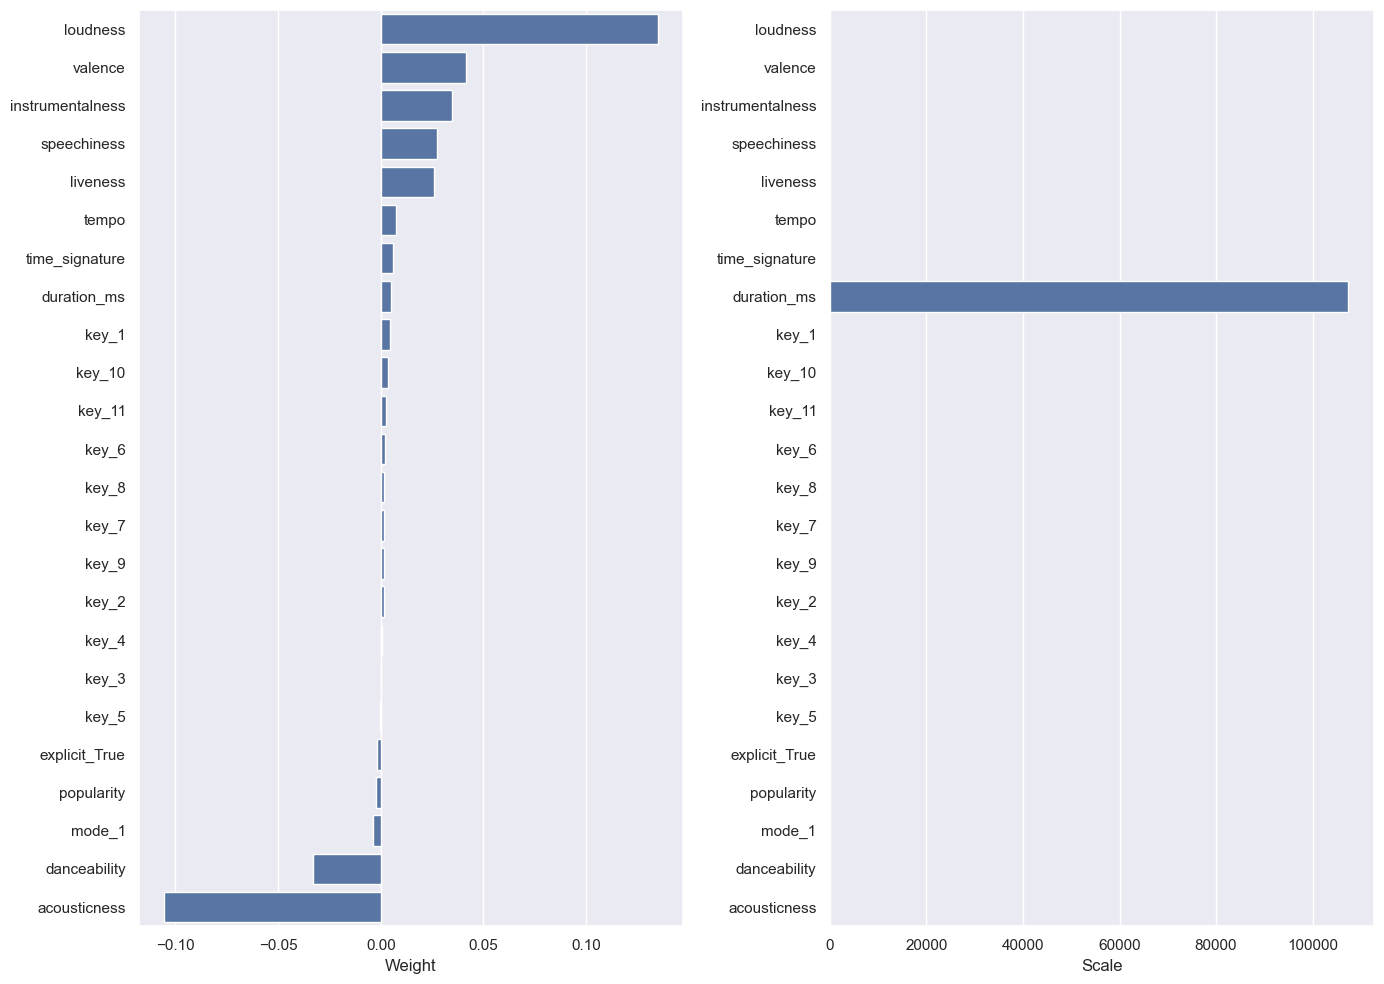

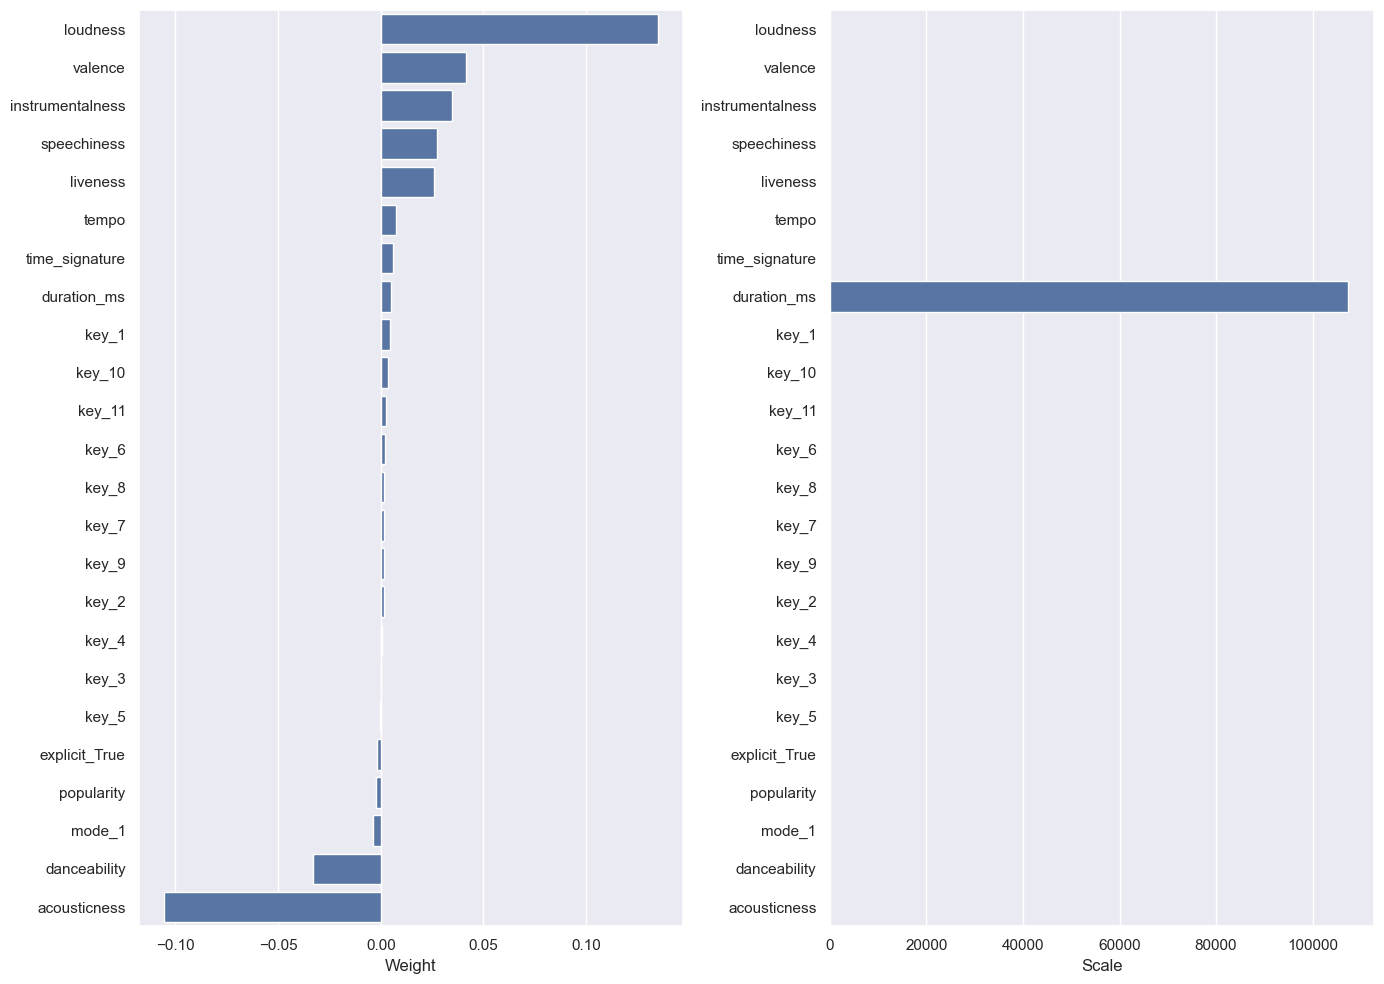

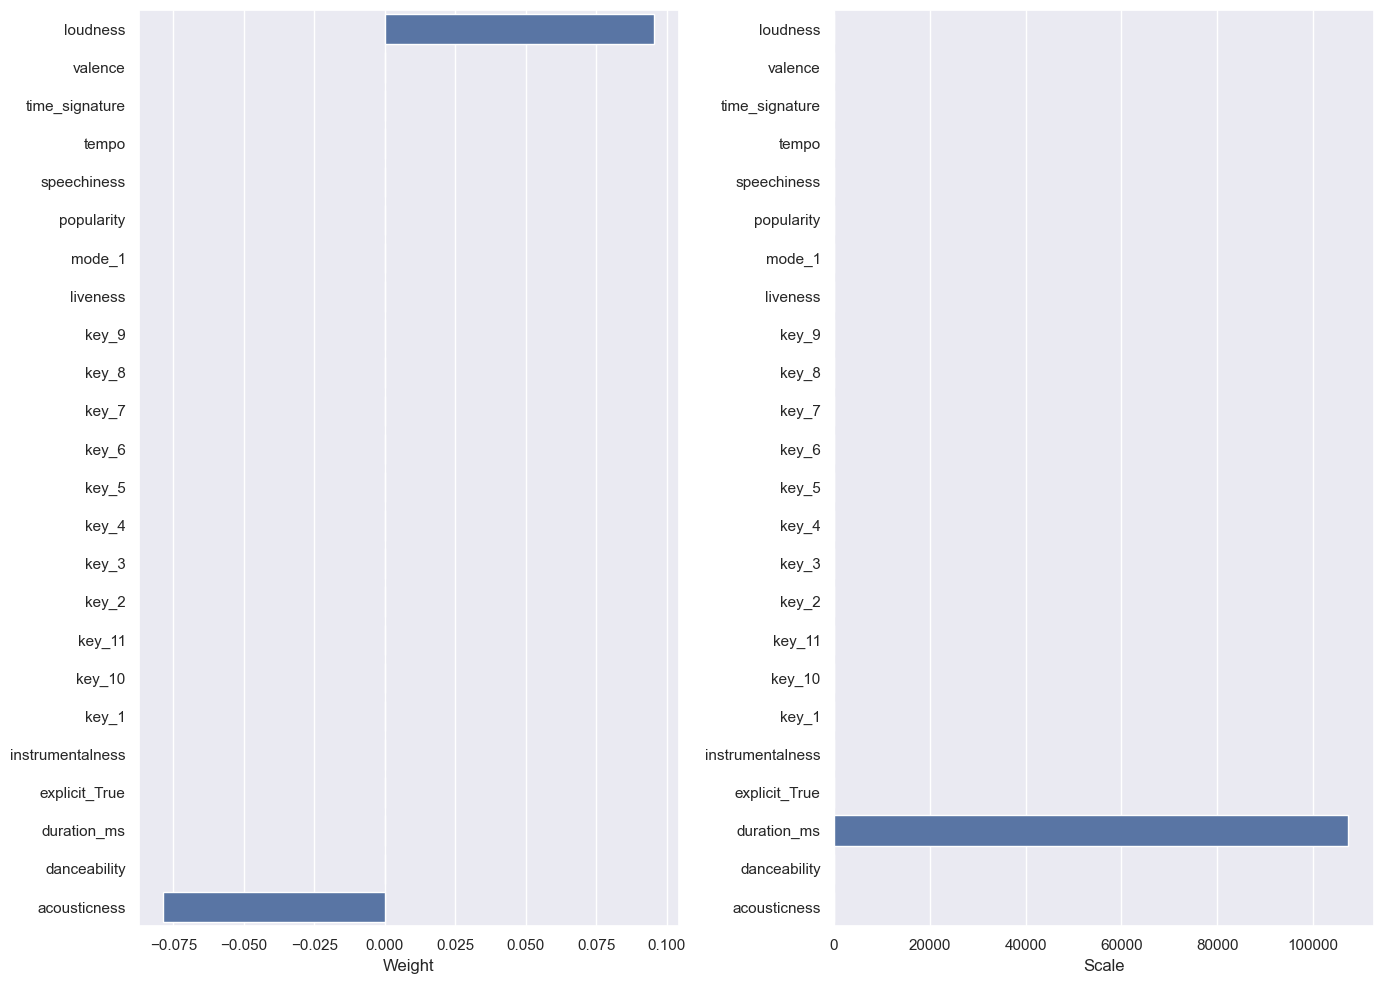

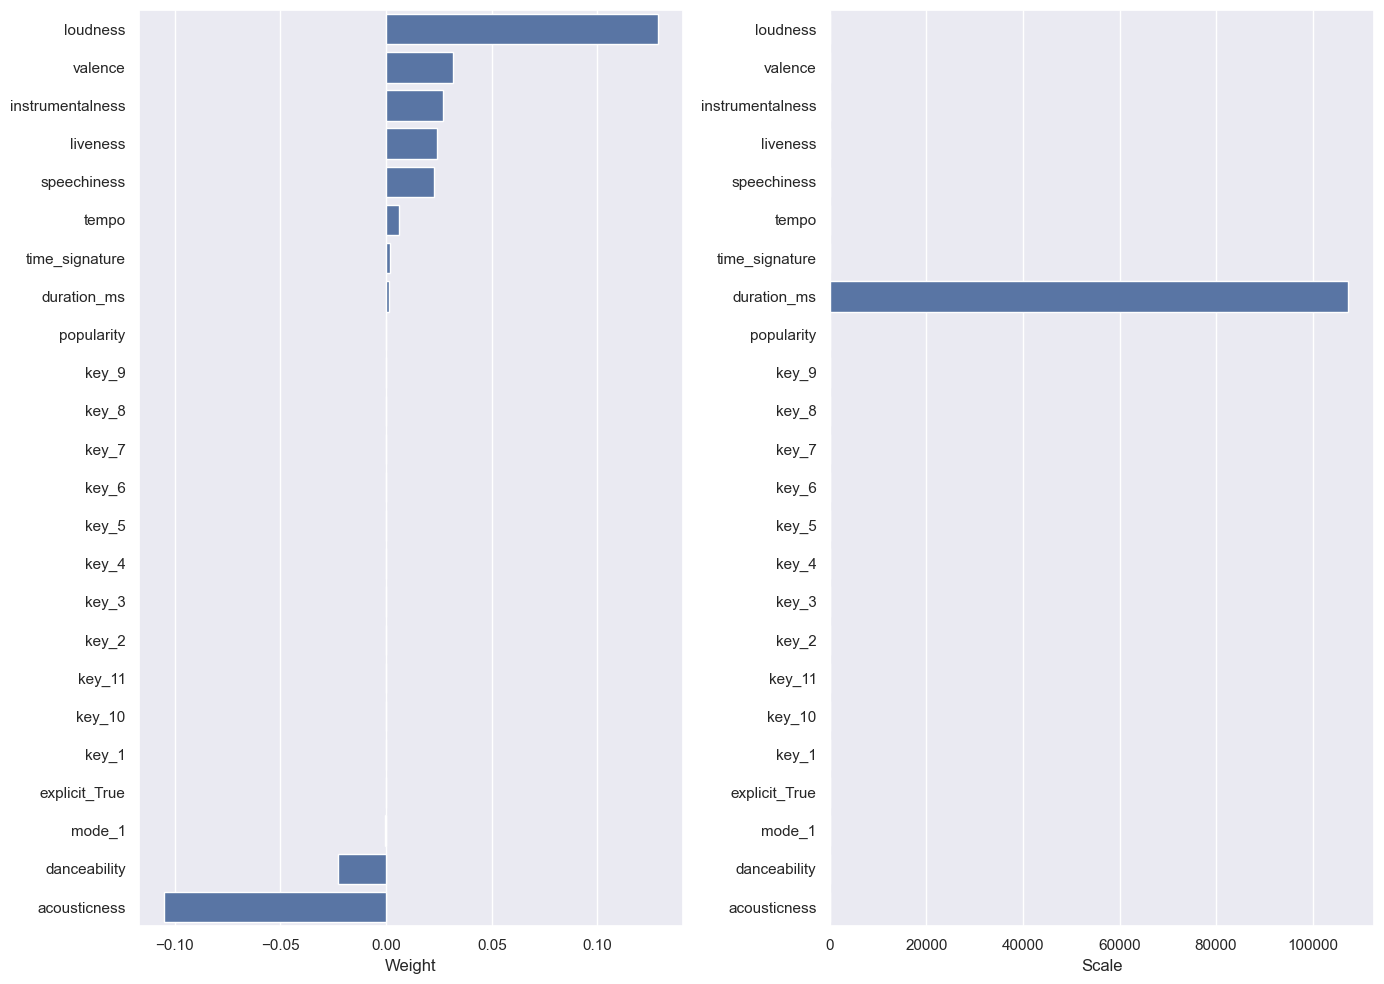

In [361]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()


print(lin_model_st.summary2())
# print(lasso_model_st.summary2())
# print(ridge_model_st.summary2())
# print(elastic_model_st.summary2())
show_weights(X_train.columns, lin_model.coef_, X_train.std())
show_weights(X_train.columns, ridge_model.coef_, X_train.std())
show_weights(X_train.columns, lasso_model.coef_, X_train.std())
show_weights(X_train.columns, elastic_model.coef_, X_train.std())

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

Воспользуемся алгоритмом Elimiantion by P-value. Установим уровень значимость l = 0.05

In [362]:
print(lin_model_st.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.168e+04
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:32:31   Log-Likelihood:                 58750.
No. Observations:               85500   AIC:                        -1.175e+05
Df Residuals:                   85475   BIC:                        -1.172e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6420      0.000  

Как мы видим из таблицы признаков нота закодированная под именем key_3 имеет нибольшее значение p value, превышающее выбранный уровень. Удалим данный признак из таблицы данных и посмотрим, как изменятся метрики модели.

In [359]:
X_train_drop = X_train_const.drop('key_3', axis=1)
model = sm.OLS(y_train.values, X_train_drop)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:21:01   Log-Likelihood:                 58750.
No. Observations:               85500   AIC:                        -1.175e+05
Df Residuals:                   85476   BIC:                        -1.172e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6420      0.000  

Как мы видим из результирующей таблицы качество модели не изменилось, значит удаленный параметр никак не влияет на предсказание модели. Далее удалим параметр ноты с именем key_5, так как он имеет значение, которое превышает выбранный уровень l. 

In [360]:
X_train_drop = X_train_drop.drop('key_5', axis=1)
model = sm.OLS(y_train.values, X_train_drop)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.275e+04
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:21:13   Log-Likelihood:                 58750.
No. Observations:               85500   AIC:                        -1.175e+05
Df Residuals:                   85477   BIC:                        -1.172e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6420      0.000  

Как выяснилось удаленные столбцы никак не влияют на качество модели, следовательно, являются незначимыми.

#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

Best alpha = 0.0001


Text(0, 0.5, 'CV score')

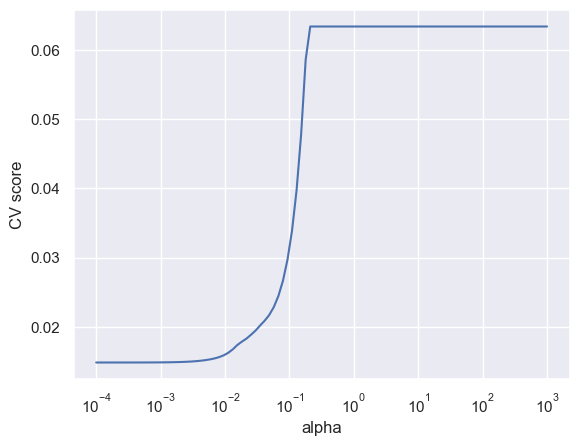

In [318]:
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-4, 3, 100)
searcher = GridSearchCV(
    Lasso(), [{"alpha": alphas}], scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [652]:
from sklearn.base import BaseEstimator


class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-6, max_iter=100000, w0=None, eta=1e-4, alpha=1e-3, epsilon=1e-5):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        self.epsilon = 1e-5
        self.indicator_ones = False
        self.indicator_stch = False
        self.h = 0
        self.g = 0
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None  # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []

        if self.indicator_ones == False:
            self.indicator_ones == True
            ones_column = np.ones((X.shape[0], 1))
            X = np.c_[ones_column, X]

        if self.w0 == None:
            self.w0 = np.random.normal(0, 1, size=X.shape[1])
            self.w = self.w0.copy()

        for i in range(self.max_iter):
            new_w = self.calc_gradient(X, y)
            diff = self.w - new_w
            if np.linalg.norm(diff, ord=1) < self.tolerance:
                break
            self.w = new_w
            self.loss_history.append(self.calc_loss(X, y))

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        ones_column = np.ones((X.shape[0], 1))
        X_new = np.c_[ones_column, X]

        return X_new.dot(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        w_temp = self.w.copy()

        if self.gd_type == "GradientDescent":
            w_temp -= 2 * self.eta * \
                np.dot(X.T, np.dot((X), self.w) - y) / y.shape[0]

        if self.gd_type == "StochasticDescent":
            if self.indicator_stch == False:
                self.indicator_stch = True
                self.batch_size = int(self.delta*len(y))
                self.sample = np.random.choice(
                    len(y), self.batch_size, replace=False)
            X_stch = X[self.sample]
            y_stch = y.values[self.sample]
            w_temp -= 2 * self.eta * \
                np.dot(X_stch.T, np.dot(X_stch,
                       self.w) - y_stch) / self.batch_size

        if self.gd_type == "Momentum":
            h_new = self.alpha*self.h + 2*self.eta * \
                np.dot(X.T, np.dot((X), self.w) - y) / y.shape[0]
            self.h = h_new
            w_temp = self.w - h_new

        if self.gd_type == "Adagrad":
            g_new = self.g + np.dot(2*np.dot(X.T, np.dot((X), self.w) - y) /
                                    y.shape[0], 2*np.dot(X.T, np.dot((X), self.w) - y) / y.shape[0])
            w_temp = self.w - self.eta * 2 * \
                np.dot(X.T, np.dot((X), self.w) - y) / \
                y.shape[0] / np.sqrt(g_new + self.epsilon)

        return w_temp

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        return np.mean((y - np.dot(X, self.w))**2)

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [653]:


# LinearRegression
lin_model_custom = LinReg(
    delta=0.3, eta=1e-1, tolerance=1e-7, max_iter=10000, gd_type="Adagrad")
lin_model_custom.fit(X_train_scaled, y_train)
y_pred = lin_model_custom.predict(X_test_scaled)

print("LinearRegression")
print("Train R^2 = %.4f" % r2_score(y_test, y_pred))
print("Test RMSE = %.4f" % mean_squared_error(
    y_test, y_pred, squared=False), end="\n\n")

AttributeError: 'LinReg' object has no attribute 'epsilon'

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

In [ ]:
# your code here
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ